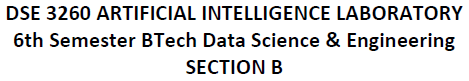

## Kartabya Krishna
## RegNo: 210968244
## Week: 05
## Date: 20240212

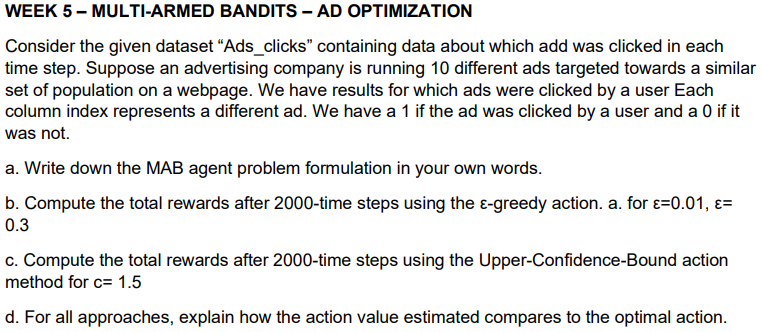